<a href="https://colab.research.google.com/github/lucialagenial/ReDI_Rossmann_proyect/blob/main/Project_rossman_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis - SS2022**

# **Final Proyect - Rossmann**

Mentor: Julien 

Team members: 
Hend, Maryam, Brindusa, Lucia

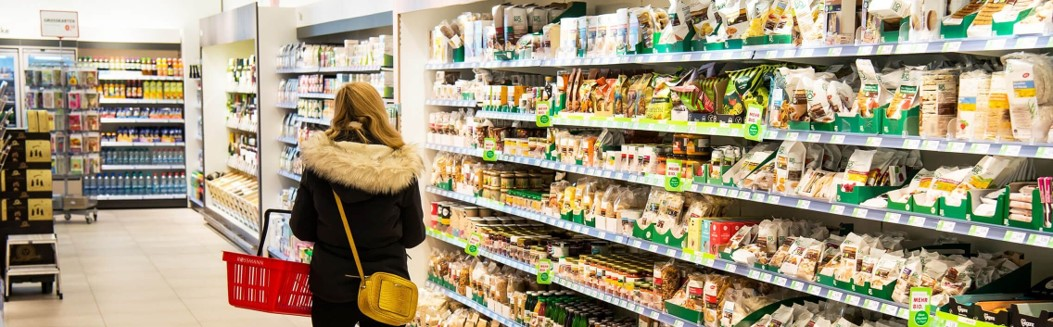

## Import libraries and load data

In [16]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# import dataframe
daily_sales=pd.read_csv("https://raw.githubusercontent.com/maryam98/ReDI-School/main/final_proj/rossman_train%20.csv", low_memory=False) 
stores=pd.read_csv("https://raw.githubusercontent.com/maryam98/ReDI-School/main/final_proj/rossman_store.csv")


## The first Data Frame: Daily Sales 

In [4]:
daily_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
daily_sales.shape


(1017209, 9)

**We named our first data Frame as daily_sales because it provides for us the data of Daily sales of each shop and other daily attributes. In this data Frame, we have more than 10K rows and 9 columns. For example the type of the store, its sales and number of customers on which day of the week. Also the availibility of the promo.**



In [6]:
open=daily_sales['Open'].value_counts().to_frame()
(open*100)/daily_sales.shape[0]

,Open
1,83.010669
0,16.989331


83% of stores in the data frame is open and fast 17% is closed


In [7]:
number_of_open_on_each_day=daily_sales.loc[daily_sales.Open==1]
number_of_open_on_each_day.groupby('DayOfWeek')[['Open']].sum()

,Open
DayOfWeek,
1,137560
2,143961
3,141936
4,134644
5,138640
6,144058
7,3593


Notice that the minimum number of open stores are on 7th day of the week 
and the maximum number of open stores is on the 6th day of the week. 

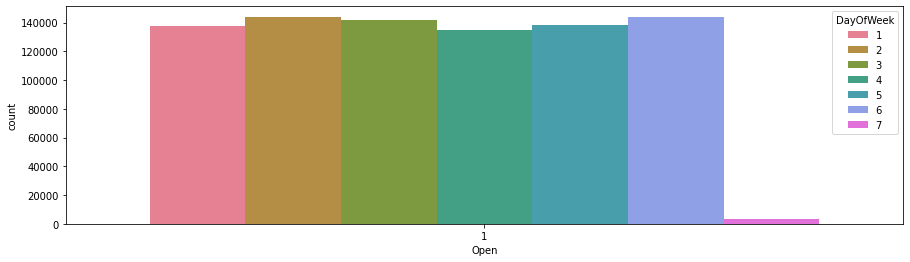

In [17]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=number_of_open_on_each_day ,palette="husl", ax=axis1)


In [12]:
daily_sales_copy=daily_sales.copy()
daily_sales_copy['Date'] = pd.to_datetime(daily_sales_copy['Date'], format='%Y-%m-%d')
daily_sales_copy['NewDate'] = daily_sales_copy['Date'].dt.to_period('M')


In [13]:
avg_sales_yearly= daily_sales_copy.groupby('NewDate')["Sales"].mean()
avg_sales_yearly

NewDate
2013-01    5211.555578
2013-02    5494.371397
2013-03    5820.349168
2013-04    5483.749836
2013-05    5364.127383
2013-06    5402.162960
2013-07    6042.062260
2013-08    5729.574049
2013-09    5322.988430
2013-10    5429.258788
2013-11    5864.601614
2013-12    6703.618140
2014-01    5431.875799
2014-02    5731.091512
2014-03    5584.257312
2014-04    5815.993333
2014-05    5632.670534
2014-06    5681.526188
2014-07    5999.403381
2014-08    5649.421252
2014-09    5865.104029
2014-10    5665.564878
2014-11    6179.249661
2014-12    6973.282456
2015-01    5752.747866
2015-02    5710.296541
2015-03    5949.130132
2015-04    5916.857578
2015-05    5472.122002
2015-06    6199.203976
2015-07    6142.705511
Freq: M, Name: Sales, dtype: float64

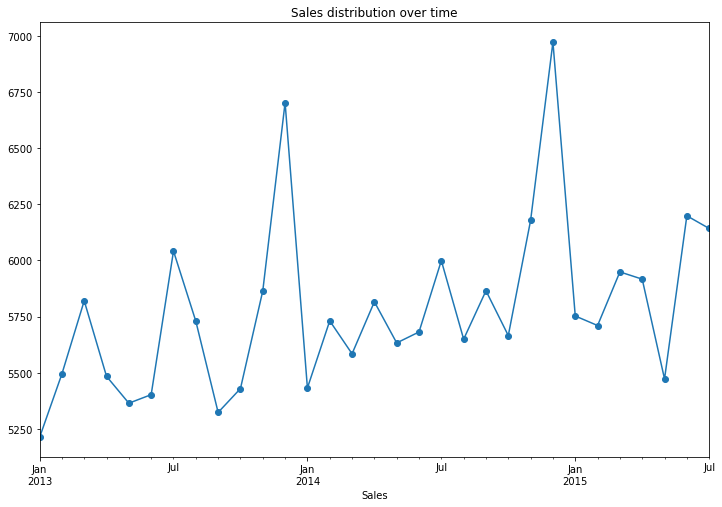

In [21]:
plt.figure(figsize = (12 , 8))
avg_sales_yearly.plot.line(x= 'NewDate', y= 'Sales',marker='o')
plt.title("Sales distribution over time")
plt.xlabel("Sales")

plt.show()

In [23]:
avg_customers_yearly= daily_sales_copy.groupby('NewDate')["Customers"].mean()
avg_customers_yearly

NewDate
2013-01    589.643068
2013-02    616.414734
2013-03    635.598496
2013-04    624.285949
2013-05    599.562737
2013-06    612.049208
2013-07    661.711124
2013-08    645.573036
2013-09    608.371629
2013-10    618.291856
2013-11    644.061824
2013-12    690.853204
2014-01    604.460784
2014-02    639.727418
2014-03    621.632663
2014-04    638.136114
2014-05    622.182844
2014-06    615.244006
2014-07    665.837433
2014-08    638.828739
2014-09    665.524029
2014-10    646.365085
2014-11    666.175829
2014-12    717.634087
2015-01    610.747317
2015-02    624.003235
2015-03    630.974714
2015-04    629.416771
2015-05    584.228208
2015-06    647.089058
2015-07    643.827224
Freq: M, Name: Customers, dtype: float64

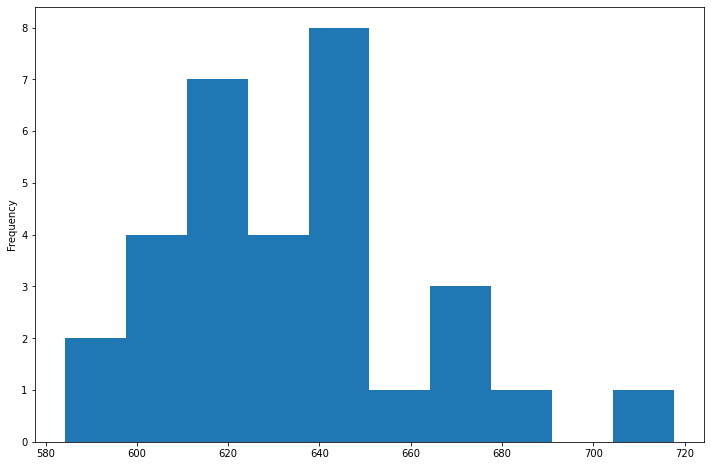

In [24]:
plt.figure(figsize = (12 , 8))

avg_customers_yearly.plot.hist(x='NewDate', y= 'Customers')
plt.show()

### The second Data Frame:Stores

In [25]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [26]:
stores.shape


(1115, 10)

In [27]:
stores.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [28]:
#percentage of the missing data 
missing_data_1= (stores['Promo2SinceWeek'].isna().sum()*100)/stores.shape[0]
missing_data_2= (stores['CompetitionOpenSinceMonth'].isna().sum()*100)/stores.shape[0]
print(missing_data_1, missing_data_2)

48.789237668161434 31.748878923766817


From cellules above we notice that there are a lot of missing data. Specially in the columns Promo2 since week, year and interval. by calculating the percentage, we notice that is fast 50% of data is missing. 

## Final Data Frame

In [29]:
daily_sales_stores = daily_sales.merge(stores,on="Store")
daily_sales_stores.head(6)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


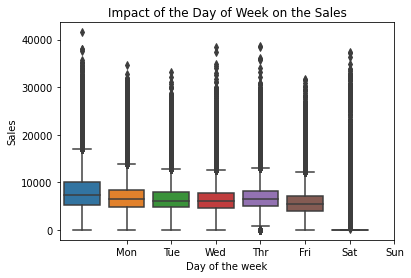

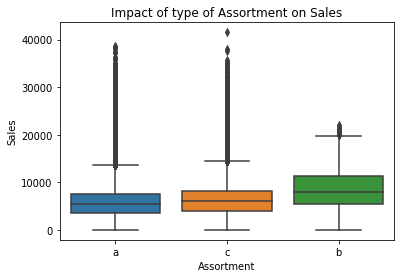

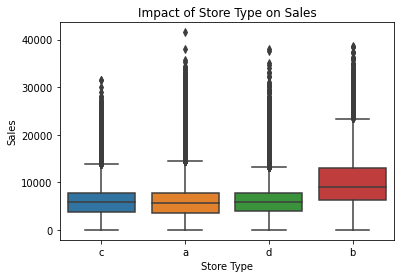

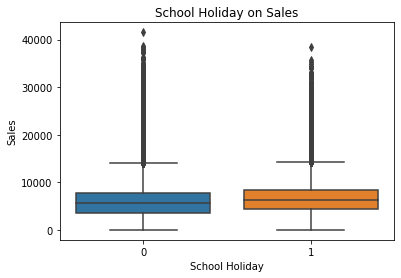

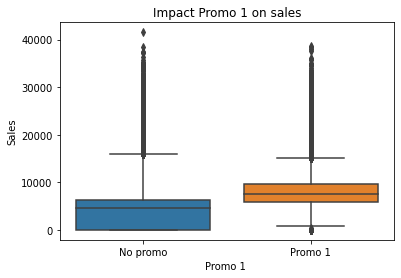

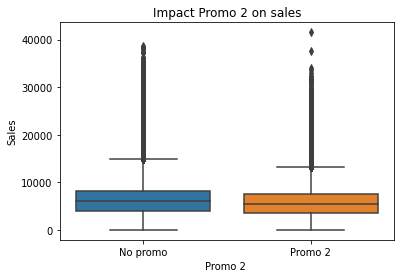

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


myboxplot = sns.boxplot(x='DayOfWeek',y='Sales', data = daily_sales_stores) 
plt.title("Impact of the Day of Week on the Sales")
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Day of the week")
plt.show()

sns.boxplot(x='Assortment',y='Sales', data = daily_sales_stores) 
plt.title("Impact of type of Assortment on Sales")
plt.show()

sns.boxplot(x='StoreType',y='Sales', data = daily_sales_stores) 
plt.title("Impact of Store Type on Sales")
plt.xlabel("Store Type")
plt.show()

sns.boxplot(x='SchoolHoliday',y='Sales', data = daily_sales_stores) 
plt.title("School Holiday on Sales")
plt.xlabel("School Holiday")
plt.show()

sns.boxplot(x='Promo',y='Sales', data = daily_sales_stores) 
plt.title("Impact Promo 1 on sales")
plt.xlabel("Promo 1 ")
plt.xticks([0, 1], ['No promo', 'Promo 1'])
plt.show()

sns.boxplot(x='Promo2',y='Sales', data = daily_sales_stores) 
plt.title("Impact Promo 2 on sales")
plt.xticks([0, 1], ['No promo', 'Promo 2'])
plt.xlabel("Promo 2 ")
plt.show()


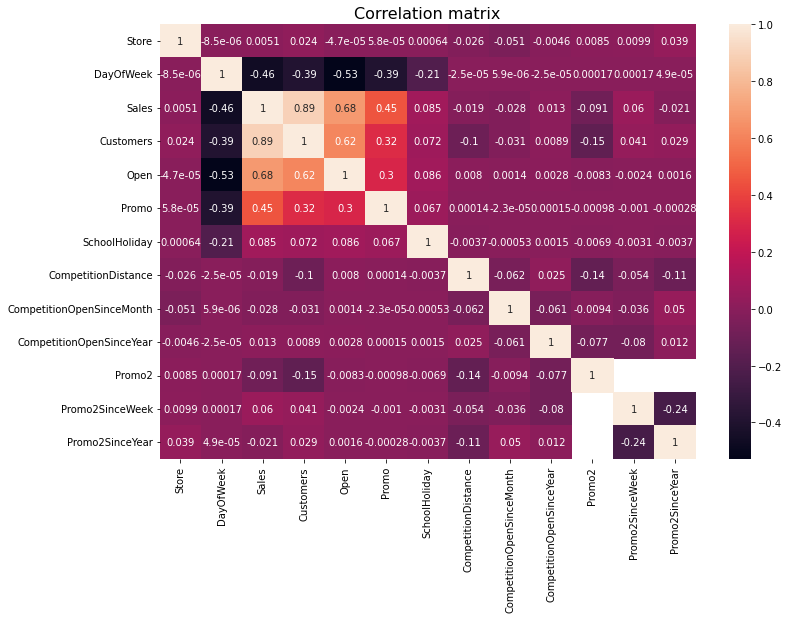

In [39]:
# correlation between numerical columns
plt.figure(figsize = (12 , 8))
df = daily_sales_stores.drop(['Date','Assortment','StoreType','PromoInterval', 'StateHoliday'],axis=1) # remove categorical columns
df = df.corr()
plt.title("Correlation matrix", fontsize=16)
sns.heatmap(df, annot=True)



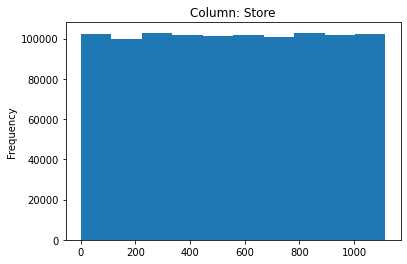

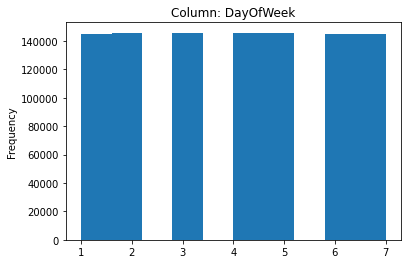

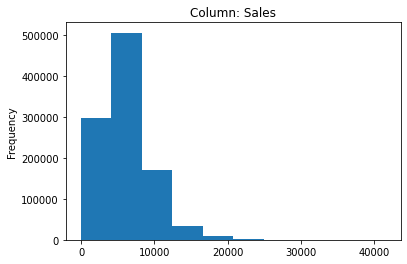

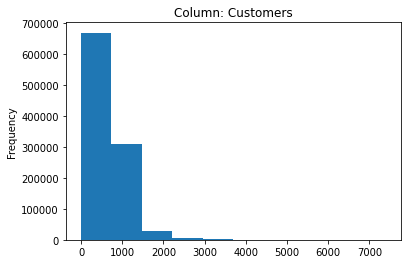

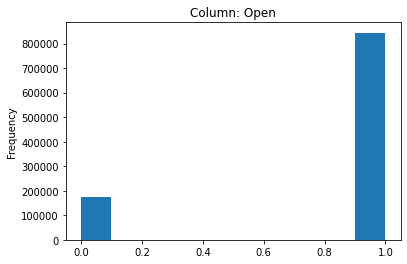

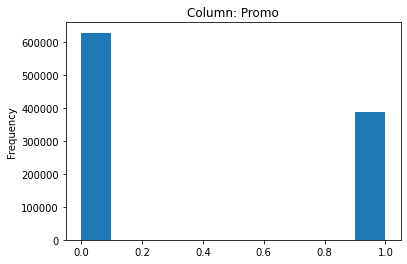

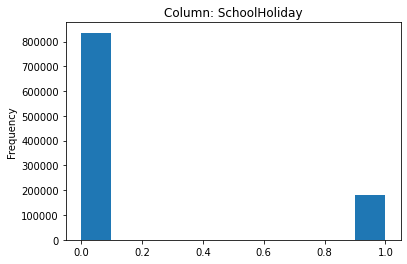

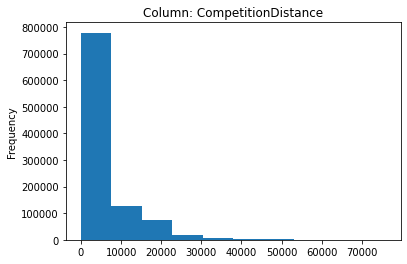

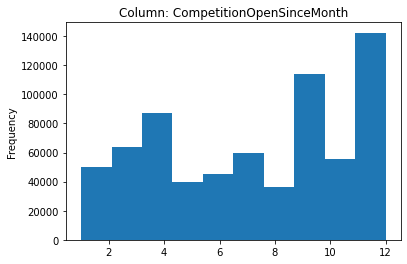

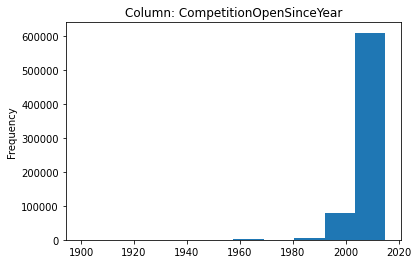

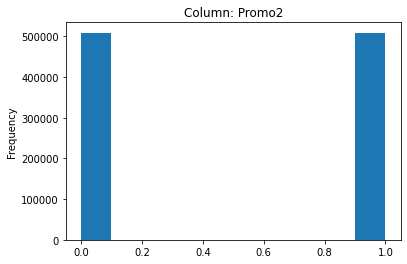

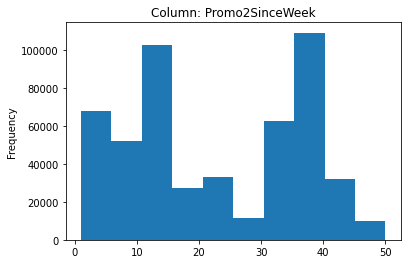

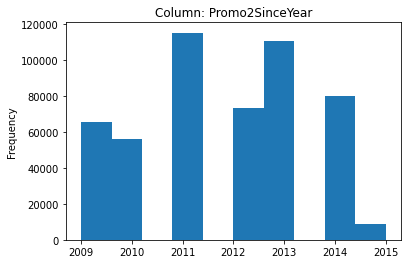

In [40]:
for colname, column_series in daily_sales_stores._get_numeric_data().iteritems():
    plt.title('Column: ' + colname)
    column_series.plot(kind='hist')
    plt.show()

## Preprocess data


In [41]:
# Apply one hot encoding to the categorical columns:
ohe_cols = ['Assortment','StoreType','StateHoliday', 'PromoInterval']
daily_sales_stores_encoded = pd.get_dummies(daily_sales_stores, columns = ohe_cols, drop_first=True)

In [42]:
# Remove columns with nas
daily_sales_stores_encoded_nonas = daily_sales_stores_encoded.dropna(axis=1) 

In [43]:
# Split data between train and test

X = daily_sales_stores_encoded_nonas.drop(['Sales','Customers','Date'],axis=1) # Customer & Sales are the outcome, they must be removed. 
y = daily_sales_stores_encoded_nonas['Sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modelling

In [44]:
# train model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# evaluation
rf.score(X_test, y_test)

0.9139483608317627

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

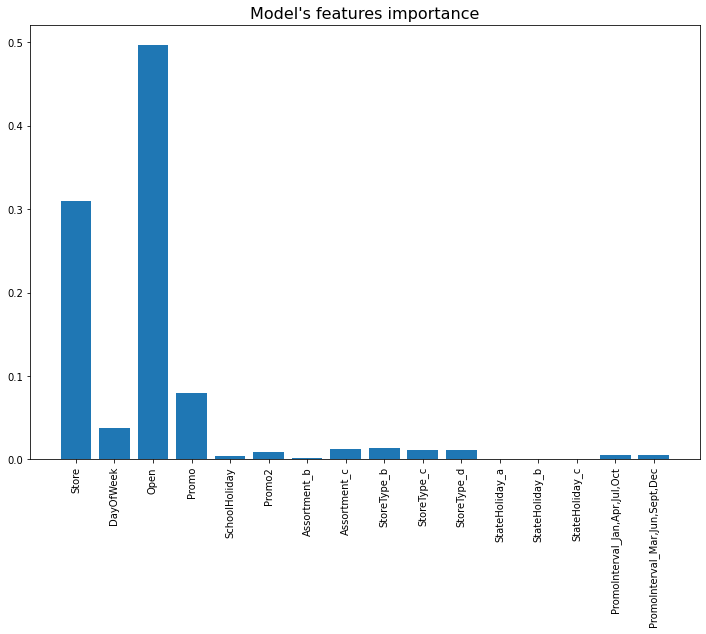

In [48]:
# features importance
plt.figure(figsize = (12 , 8))
plt.title("Model's features importance", fontsize=16)
plt.bar(rf.feature_names_in_,rf.feature_importances_)
plt.xticks(rotation=90)

Thank you!